In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from math import sqrt
import numpy
import matplotlib.pyplot as pyplot
import collections
import sklearn
import copy
from scipy import stats
import pydotplus
import pydot
from sklearn import tree
from IPython.display import Image 
from sklearn.utils import resample
import os

import functions as func

#Change these as desired
LABEL = "MfI1_beste"
other1 = "Prog1_beste"
other2 = "beste"
other3 = "beide"


def print_acc(model,train_X,train_y,test_X,test_y):
    """Prints accuracy on train and test data

    Parameters
    ----------
    model : DecisionTreeClassifier
        The model to evaluate
    train_X : DataFrame
        DataFrame with all features of train data
    train_y : list of Strings
        A list containing labels of train data
    test_X : DataFrame
        DataFrame with all features of test data
    test_y : list of Strings
        A list containing labels of test data
    """
    
    acc_train = accuracy_score(model.predict(train_X),train_y)
    acc_test = accuracy_score(model.predict(test_X),test_y)    
    print("Train:", acc_train)
    print("Test:", acc_test)
    

def confidence(pos, neg, confidence=0.95):
    """Calculates lower bound of Wilson-Score interval

    Parameters
    ----------
    pos : int
        Number of positive samples
    neg : int
        Number of negative samples
    confidence : float, optional
        An indicator of confidence level (default 0.95)
        
    Returns
    -------
    float
        lower bound of Wilson-Score interval
    """
    
    n = pos + neg

    if n == 0:
        return 0

    z = stats.norm.ppf(confidence)
    p = float(pos) / n
    return ((p + z*z/(2*n) - z * sqrt((p*(1-p)+z*z/(4*n))/n))/(1+z*z/n))

def calculate_confidence_for_sample(s):
    """Calculates confidence of prediction for a single sample using Wilson-Score. Belongs to scenarios 4 - 6.

    Parameters
    ----------
    s : numpy.ndarray
        Feature array of sample
        
    Returns
    -------
    (float, float)
        prediction, confidence of prediction
    """
    
    pred = dt.predict(s)
    leaf_id = dt.apply(s)
    if(pred[0] == 0):
        pos = dt.tree_.value[leaf_id][0][0][0]
        neg = dt.tree_.value[leaf_id][0][0][1]
    else:
        neg = dt.tree_.value[leaf_id][0][0][0]
        pos = dt.tree_.value[leaf_id][0][0][1]
    conf = confidence(pos,neg)
    return pred[0], conf


def calculate_confidence_for_sample_marks(s):
    """Calculates confidence of prediction for a single sample using Wilson-Score. Belongs to scenarios 1 - 3.

    Parameters
    ----------
    s : numpy.ndarray
        Feature array of sample
        
    Returns
    -------
    (float, float)
        prediction, confidence of prediction
    """
    
    pred = dt.predict(s)
    leaf_id = dt.apply(s)
    neg = 0
    pos = 0
    array = dt.tree_.value[leaf_id][0][0]
    if(pred[0] == 100):
        pos = array[0]
        for i in range(0,10):
            neg += numpy.delete(array, [0])[i] 
    elif(pred[0] == 130):
        pos = array[1]
        for i in range(0,10):
            neg += numpy.delete(array, [1])[i] 
    elif(pred[0] == 170):
        pos = array[2]
        for i in range(0,10):
            neg += numpy.delete(array, [2])[i] 
    elif(pred[0] == 200):
        pos = array[3]
        for i in range(0,10):
            neg += numpy.delete(array, [3])[i] 
    elif(pred[0] == 230):
        pos = array[4]
        for i in range(0,10):
            neg += numpy.delete(array, [4])[i] 
    elif(pred[0] == 270):
        pos = array[5]
        for i in range(0,10):
            neg += numpy.delete(array, [5])[i]
    elif(pred[0] == 300):
        pos = array[6]
        for i in range(0,10):
            neg += numpy.delete(array, [6])[i]
    elif(pred[0] == 330):
        pos = array[7]
        for i in range(0,10):
            neg += numpy.delete(array, [7])[i]
    elif(pred[0] == 370):
        pos = array[8]
        for i in range(0,10):
            neg += numpy.delete(array, [8])[i]
    elif(pred[0] == 400):
        pos = array[9]
        for i in range(0,10):
            neg += numpy.delete(array, [9])[i] 
    elif(pred[0] == 500):
        pos = array[10]
        for i in range(0,10):
            neg += numpy.delete(array, [10])[i] 
    conf = confidence(pos,neg)
    return pred[0], conf



In [2]:
data,_,y,train_X,test_X,train_y,test_y,names,feature_names,numcols,numrows = func.load_data_bestanden(LABEL,other1, other2, other3)
dt = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt.fit(train_X, train_y)
print_acc(dt,train_X,train_y,test_X,test_y)
probs = dt.predict_proba(test_X)


Train: 1.0
Test: 0.4473684210526316


In [3]:
os.makedirs(os.path.dirname("graphs/dot/dt_classifier_noten.dot"), exist_ok = True)

dot = tree.export_graphviz(dt, out_file='graphs/dot/dt_classifier_noten.dot', feature_names= train_X.columns,
                     filled=True, rounded=True,special_characters=True)

!dot -T png graphs/dot/dt_classifier_noten.dot -o graphs/dt_classifier_noten.png

In [4]:
data_raw = data.to_numpy()

In [5]:
leaf_ids = dt.apply(test_X)
dt.tree_.value[leaf_ids]

idx = 10
pred, conf = calculate_confidence_for_sample(test_X.to_numpy()[idx].reshape(1, -1))
prediction = "bestanden"
if pred == 1.0:
    prediction = "nicht bestanden"
print("Der Datensatz wird als {} klassifiziert mit einer Confidence von {}".format(prediction,conf))
print(dt.apply(test_X.to_numpy()[idx].reshape(1, -1)))
dt.tree_.value[dt.apply(test_X.to_numpy()[idx].reshape(1, -1))][0]


Der Datensatz wird als bestanden klassifiziert mit einer Confidence von 0.922042901945218
[21]


array([[32.,  0.]])

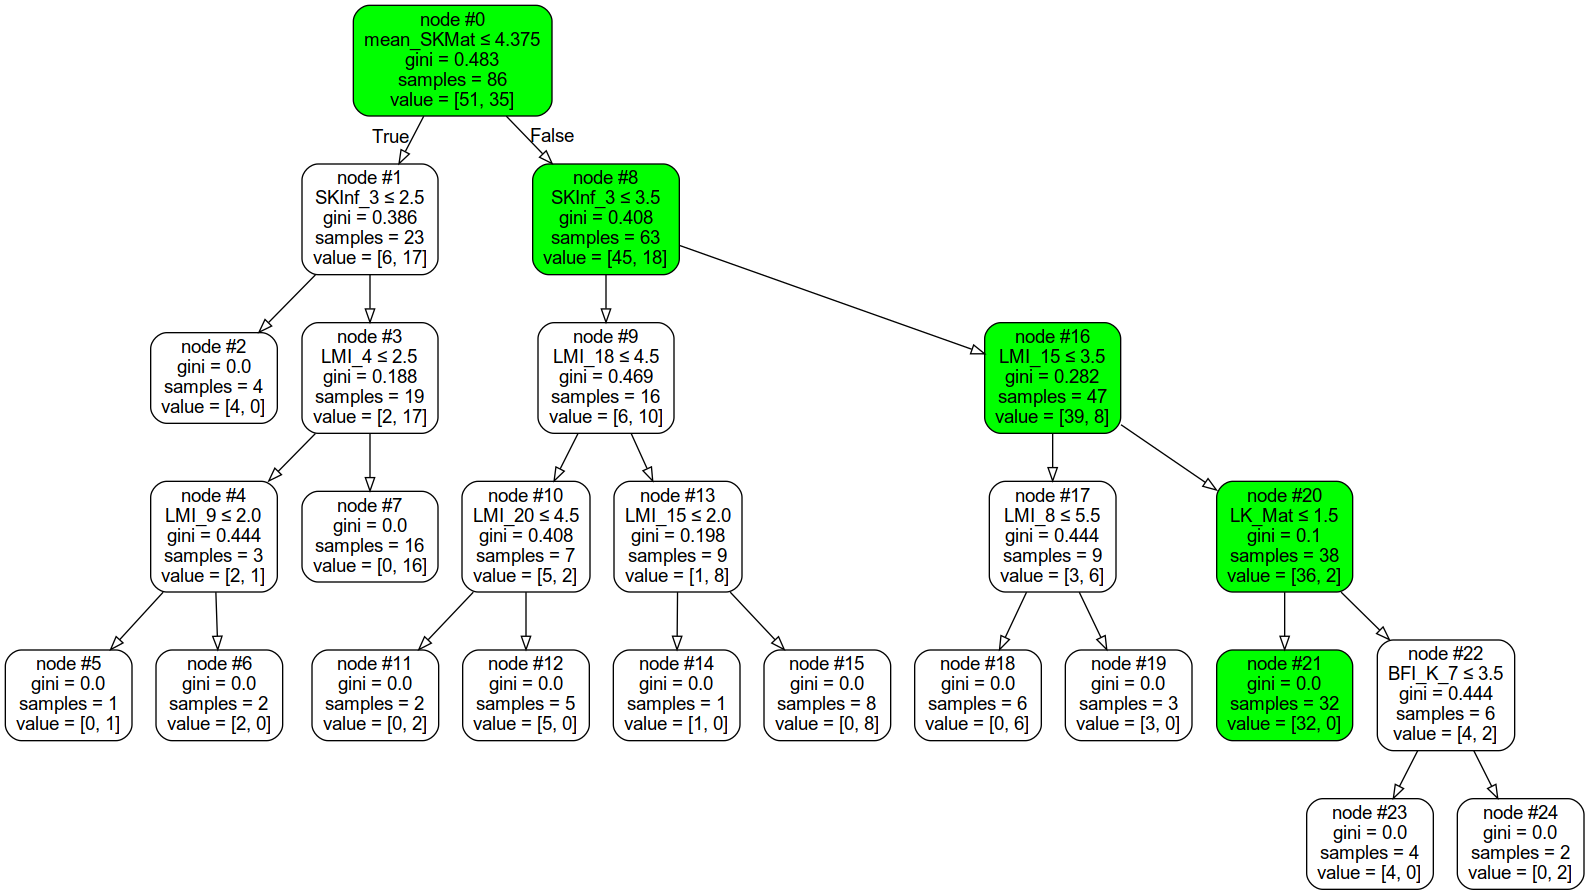

In [6]:
graph = func.plot_decision_path(dt,test_X.to_numpy()[idx].reshape(1, -1), train_X)
Image(graph.create_png())

Der Datensatz wird als 400.0 klassifiziert mit einer Confidence von 0.5258044258424873


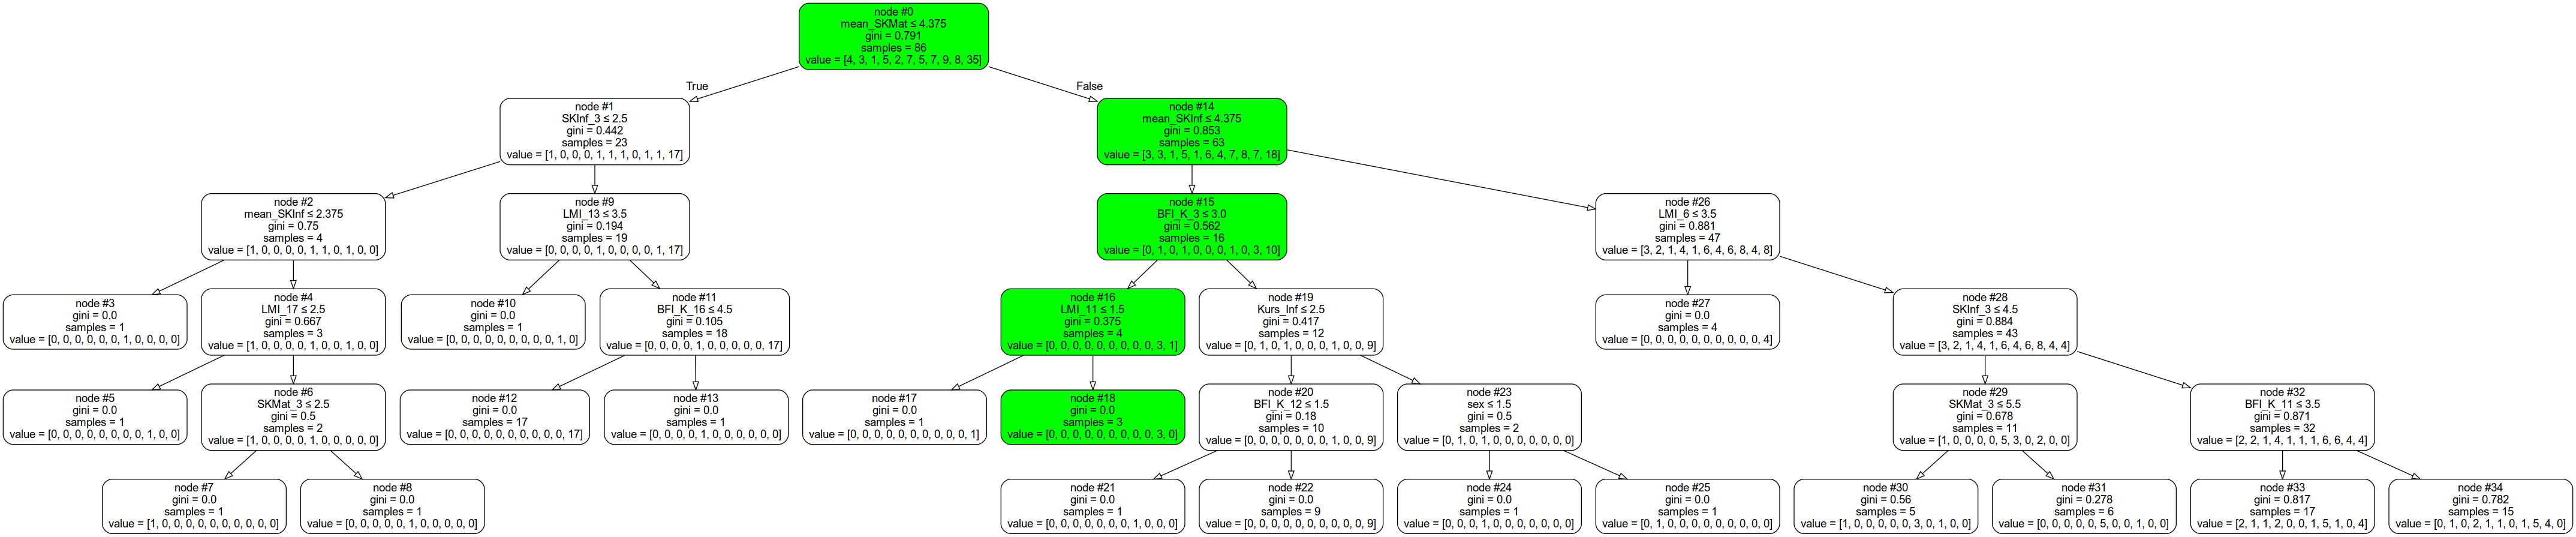

In [7]:
#Scenarios 1. - 3., remember that 1a. is not suitable for accuracy
#Change these as desired
LABEL = "MfI1_beste"
other1 = "Prog1_beste"
other2 = "beste"

data,_,y,train_X,test_X,train_y,test_y,names,feature_names,numcols,numrows = func.load_data_noten(LABEL,other1, other2)
dt = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt.fit(train_X, train_y)
pred, conf = calculate_confidence_for_sample_marks(test_X.to_numpy()[idx].reshape(1, -1))
print("Der Datensatz wird als {} klassifiziert mit einer Confidence von {}".format(pred,conf))
graph = func.plot_decision_path(dt,test_X.to_numpy()[idx].reshape(1, -1), train_X)
Image(graph.create_png())